In [4]:
import pandas as pd
from utils import *

In [5]:
import math

In [6]:
url = "https://marvel.fandom.com/wiki/X-Men_Vol_1_94"
soup = soup_from_url(url)

In [3]:
#grab the page's categories (at the bottom of the page)

categories = soup.find_all("ul", class_="categories")[0].find_all("span", class_="name")
#categories = [c.find_all("") for c in categories]

In [4]:
c = categories[0]
print(c)

<span class="name"><a href="/wiki/Category:Comics" title="Category:Comics">Comics</a></span>


In [5]:
print(c.find("a").get("href"))
print(c.find("a").get("title"))

/wiki/Category:Comics
Category:Comics


**Note:** All characters have the dimension they come from in their name. If we want to filter by characters (as opposed to items, locations, groups etc.), we can simply grab the ones that have "(Earth-xxx)" in their name.

In [6]:
characters_in_issue = []
for c in categories:
    a_tag = c.find("a")
    u, name = a_tag.get("href"), a_tag.get("title")
    if "(Earth-" in name:
        # preemptively filter by characters
        characters_in_issue.append({"url": u, "name": name})
characters_in_issue = pd.DataFrame(characters_in_issue)
characters_in_issue.head()

,url,name
0,/wiki/Category:X-Men_(Earth-616)/Appearances,Category:X-Men (Earth-616)/Appearances
1,/wiki/Category:Piotr_Rasputin_(Earth-616)/Appe...,Category:Piotr Rasputin (Earth-616)/Appearances
2,/wiki/Category:Scott_Summers_(Earth-616)/Appea...,Category:Scott Summers (Earth-616)/Appearances
3,/wiki/Category:Kurt_Wagner_(Earth-616)/Appeara...,Category:Kurt Wagner (Earth-616)/Appearances
4,/wiki/Category:Alexander_Summers_(Earth-616)/A...,Category:Alexander Summers (Earth-616)/Appeara...


In [7]:
# clean up the names
#remove 'Category:' from the name

characters_in_issue["name"] = characters_in_issue["name"].str.replace("Category:", "")
characters_in_issue.head()

,url,name
0,/wiki/Category:X-Men_(Earth-616)/Appearances,X-Men (Earth-616)/Appearances
1,/wiki/Category:Piotr_Rasputin_(Earth-616)/Appe...,Piotr Rasputin (Earth-616)/Appearances
2,/wiki/Category:Scott_Summers_(Earth-616)/Appea...,Scott Summers (Earth-616)/Appearances
3,/wiki/Category:Kurt_Wagner_(Earth-616)/Appeara...,Kurt Wagner (Earth-616)/Appearances
4,/wiki/Category:Alexander_Summers_(Earth-616)/A...,Alexander Summers (Earth-616)/Appearances


In [8]:
# put the type of appearance in a new column
# split the name at the "/" and take the second half
characters_in_issue["type of appearance"] = characters_in_issue["name"].str.split("/").str[-1]

#remove the type of appearance from the name
characters_in_issue["name"] = characters_in_issue["name"].str.split("/").str[0]

characters_in_issue

,url,name,type of appearance
0,/wiki/Category:X-Men_(Earth-616)/Appearances,X-Men (Earth-616),Appearances
1,/wiki/Category:Piotr_Rasputin_(Earth-616)/Appe...,Piotr Rasputin (Earth-616),Appearances
2,/wiki/Category:Scott_Summers_(Earth-616)/Appea...,Scott Summers (Earth-616),Appearances
3,/wiki/Category:Kurt_Wagner_(Earth-616)/Appeara...,Kurt Wagner (Earth-616),Appearances
4,/wiki/Category:Alexander_Summers_(Earth-616)/A...,Alexander Summers (Earth-616),Appearances
5,/wiki/Category:James_Howlett_(Earth-616)/Appea...,James Howlett (Earth-616),Appearances
6,/wiki/Category:Ororo_Munroe_(Earth-616)/Appear...,Ororo Munroe (Earth-616),Appearances
7,/wiki/Category:Jean_Grey_(Earth-616)/Appearances,Jean Grey (Earth-616),Appearances
8,/wiki/Category:Warren_Worthington_III_(Earth-6...,Warren Worthington III (Earth-616),Appearances
9,/wiki/Category:Charles_Xavier_(Earth-616)/Appe...,Charles Xavier (Earth-616),Appearances


## Now build a graph of the characters in the issue

In [9]:
characters_in_issue[["name","type of appearance"]].head()

,name,type of appearance
0,X-Men (Earth-616),Appearances
1,Piotr Rasputin (Earth-616),Appearances
2,Scott Summers (Earth-616),Appearances
3,Kurt Wagner (Earth-616),Appearances
4,Alexander Summers (Earth-616),Appearances


In [11]:
grouped_by_type_of_appearance = characters_in_issue.groupby("type of appearance")["name"].apply(list)
grouped_by_type_of_appearance = pd.DataFrame(grouped_by_type_of_appearance)
grouped_by_type_of_appearance = grouped_by_type_of_appearance.transpose()
grouped_by_type_of_appearance["Title"] = "X-Men 94"
grouped_by_type_of_appearance

type of appearance,Appearances,Invocations,Mentions,Minor Appearances,Quotes,Title
name,"[X-Men (Earth-616), Piotr Rasputin (Earth-616)...",[Yahweh (Earth-616)],"[Hirohito (Earth-616), Maggia (Earth-616), Ant...","[Avengers (Earth-616), Henry McCoy (Earth-616)...",[Warren Worthington III (Earth-616)],X-Men 94


In [12]:
grouped_by_type_of_appearance["Appearances"]

name    [X-Men (Earth-616), Piotr Rasputin (Earth-616)...
Name: Appearances, dtype: object

Minor appearances should have a smaller weight than major appearances.

In [25]:
def geometric_mean(*args):
    return math.pow(math.prod(args), 1./len(args))

In [17]:
connection_weight_table = {"Appearances":10,
                           "Minor Appearances":2,
                           "Mentions":0,
                           "Invocations":0}

connections = []

for _, (c1, appearance1) in characters_in_issue[["name", "type of appearance"]].iterrows():
    for __, (c2, appearance2) in characters_in_issue[["name", "type of appearance"]].iterrows():
        # print(c1,appearance1)
        if c1 == c2:
            continue
        if not (appearance1 in connection_weight_table and appearance2 in connection_weight_table):
            continue
        # weight = min(connection_weight_table[appearance1],
        #              connection_weight_table[appearance2])
        weight = geometric_mean(connection_weight_table[appearance1], connection_weight_table[appearance2])
        conn = {"source":c1, "target":c2, "weight":weight}
        connections.append(conn)
connections = pd.DataFrame(connections)
connections

,source,target,weight
0,X-Men (Earth-616),Piotr Rasputin (Earth-616),100
1,X-Men (Earth-616),Scott Summers (Earth-616),100
2,X-Men (Earth-616),Kurt Wagner (Earth-616),100
3,X-Men (Earth-616),Alexander Summers (Earth-616),100
4,X-Men (Earth-616),James Howlett (Earth-616),100
...,...,...,...
1477,Krakoa (Earth-616),Leopold Stryke (Earth-616),0
1478,Krakoa (Earth-616),Samuel Smithers (Earth-616),0
1479,Krakoa (Earth-616),Alexander Gentry (Earth-616),0
1480,Krakoa (Earth-616),Maggia (Earth-616),0


Now actually plot it.

In [39]:
import networkx as nx

In [40]:
G = nx.from_pandas_edgelist(connections,
                           source = "source",
                           target = "target",
                           edge_attr = "weight",
                           create_using = nx.Graph())


In [41]:
pos = nx.kamada_kawai_layout(G)

In [42]:
import matplotlib.pyplot as plt

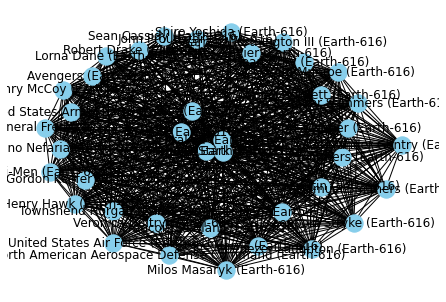

In [43]:
nx.draw(G, with_labels=True, node_size=300, edge_cmap=plt.cm.Blues, node_color="skyblue", pos=pos)
plt.show()

In [1]:
import utils

In [7]:


#utils.table_of_appearances_from_issue("X-Men 94", url)

d:\Library\Documents\GitHub\web-of-marvel-characters\utils.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  characters["name"] = characters["name"].str.replace("(Earth-616)", "")


ValueError: too many values to unpack (expected 2)

In [2]:
import pandas as pd
pppp = pd.read_csv("./data/table_of_appearances.csv")

In [22]:
graph_table = pd.read_csv("./data/graph_table.csv")

In [31]:
graph_table = graph_table[graph_table["weight"]>=100]

In [4]:
import networkx as nx

In [32]:
G = nx.from_pandas_edgelist(graph_table,
                           source = "source",
                           target = "target",
                           edge_attr = "weight",
                           create_using = nx.Graph())

In [25]:
pos = nx.kamada_kawai_layout(G)

In [8]:
import matplotlib.pyplot as plt

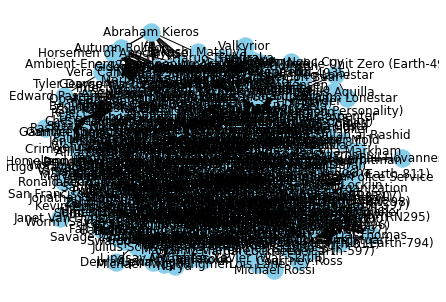

In [26]:
nx.draw(G, with_labels=True, node_size=300, edge_cmap=plt.cm.Blues, node_color="skyblue", pos=pos)
plt.show()

In [27]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Ororo Munroe': 0.5336134453781513,
 'X-Men': 0.5588235294117647,
 'James Howlett': 0.5021008403361344,
 'Piotr Rasputin': 0.46428571428571425,
 'Kurt Wagner': 0.4264705882352941,
 'Scott Summers': 0.4789915966386554,
 'Samuel Guthrie': 0.3802521008403361,
 'New Mutants': 0.3319327731092437,
 'Rahne Sinclair': 0.29831932773109243,
 'Jean Grey': 0.34243697478991597,
 'Roberto Da Costa': 0.32983193277310924,
 'Charles Xavier': 0.32983193277310924,
 'Katherine Pryde': 0.34243697478991597,
 'Henry McCoy': 0.3004201680672269,
 'Warren Worthington III': 0.3088235294117647,
 'Danielle Moonstar': 0.26260504201680673,
 'Robert Drake': 0.2815126050420168,
 'Rogue (Anna Marie)': 0.3130252100840336,
 'X-Factor': 0.2773109243697479,
 'Warlock (Technarch)': 0.24579831932773108,
 'Alexander Summers': 0.2710084033613445,
 'Sean Cassidy': 0.3130252100840336,
 'Elizabeth Braddock': 0.2857142857142857,
 'Illyana Rasputina': 0.19117647058823528,
 'Rachel Summers (Earth-811)': 0.24579831932773108,
 'Moira

<AxesSubplot:>

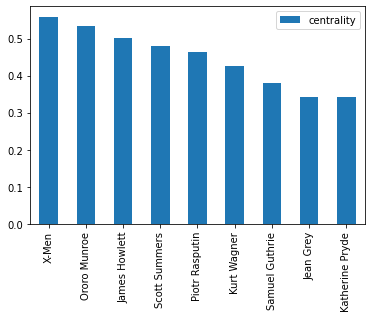

In [28]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

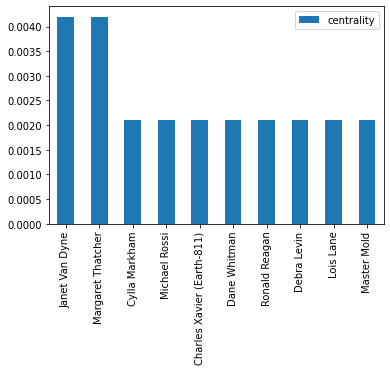

In [29]:
degree_df.sort_values('centrality', ascending=False)[-10:].plot(kind="bar")

In [ ]:
degrees_df

<AxesSubplot:>

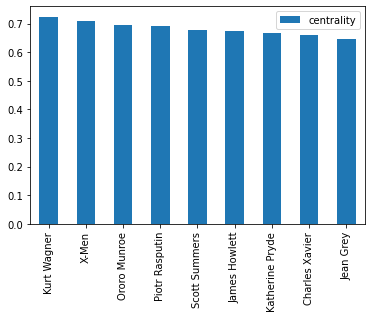

In [12]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [17]:
from pyvis.network import Network

In [33]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("X-Men (3).html")